In [1]:
import os
print(os.getcwd())

C:\Users\HP


In [4]:
print(os.listdir())

['.arduinoIDE', '.bash_history', '.gitconfig', '.ipynb_checkpoints', '.ipython', '.jupyter', '.lesshst', '.stm32cubeide', '.stm32cubemx', '.stmcube', '.stmcufinder', '.viminfo', '.VirtualBox', '.vscode', '3D Objects', 'AppData', 'Application Data', 'Book1.csv', 'Contacts', 'Cookies', 'Desktop', 'Document from Pugal Pugal.pdf', 'Documents', 'Downloads', 'Favorites', 'IntelGraphicsProfiles', 'Links', 'Local Settings', 'Master_notes (2) (1).ipynb', 'Music', 'My Documents', 'NetHood', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.DAT{53b39e87-18c4-11ea-a811-000d3aa4692b}.TxR.0.regtrans-ms', 'NTUSER.DAT{53b39e87-18c4-11ea-a811-000d3aa4692b}.TxR.1.regtrans-ms', 'NTUSER.DAT{53b39e87-18c4-11ea-a811-000d3aa4692b}.TxR.2.regtrans-ms', 'NTUSER.DAT{53b39e87-18c4-11ea-a811-000d3aa4692b}.TxR.blf', 'NTUSER.DAT{53b39e88-18c4-11ea-a811-000d3aa4692b}.TM.blf', 'NTUSER.DAT{53b39e88-18c4-11ea-a811-000d3aa4692b}.TMContainer00000000000000000001.regtrans-ms', 'NTUSER.DAT{53b39e88-18c4-11ea-a811-0

In [5]:
!pip install pandas
import pandas as pd


[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:

import pandas as pd

# Try the Windows encoding
df = pd.read_csv("superstore.csv", encoding="latin1")  # also called ISO-8859-1
print(df.head())


         Order ID order_date  Customer Name   Region         Category  \
0  US-2021-103800   1/1/2011  Darren Powers  Central  Office Supplies   
1  US-2021-112326   1/1/2011  Phillina Ober  Central  Office Supplies   
2  US-2021-112326   1/1/2011  Phillina Ober  Central  Office Supplies   
3  US-2021-112326   1/1/2011  Phillina Ober  Central  Office Supplies   
4  US-2021-141817   1/1/2011     Mick Brown     East  Office Supplies   

  Sub-Category    Sales   Profit  
0        Paper   16.448   5.5512  
1      Binders    3.540  -5.4870  
2       Labels   11.784   4.2717  
3      Storage  272.736 -64.7748  
4          Art   19.536   4.8840  


In [10]:
df.info()


<class 'pandas.DataFrame'>
RangeIndex: 1078 entries, 0 to 1077
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       1078 non-null   str    
 1   order_date     1078 non-null   str    
 2   Customer Name  1078 non-null   str    
 3   Region         1078 non-null   str    
 4   Category       1078 non-null   str    
 5   Sub-Category   1078 non-null   str    
 6   Sales          1078 non-null   float64
 7   Profit         1078 non-null   float64
dtypes: float64(2), str(6)
memory usage: 67.5 KB


In [12]:
df.isnull().sum()

Order ID         0
order_date       0
Customer Name    0
Region           0
Category         0
Sub-Category     0
Sales            0
Profit           0
dtype: int64

In [14]:
df.dropna(inplace=True)

In [15]:
df['Profit_Margin'] = (df['Profit'] / df['Sales']) * 100

In [16]:
df.head()

,Order ID,order_date,Customer Name,Region,Category,Sub-Category,Sales,Profit,Profit_Margin
0,US-2021-103800,1/1/2011,Darren Powers,Central,Office Supplies,Paper,16.448,5.5512,33.75
1,US-2021-112326,1/1/2011,Phillina Ober,Central,Office Supplies,Binders,3.540,-5.4870,-155.00
2,US-2021-112326,1/1/2011,Phillina Ober,Central,Office Supplies,Labels,11.784,4.2717,36.25
3,US-2021-112326,1/1/2011,Phillina Ober,Central,Office Supplies,Storage,272.736,-64.7748,-23.75
4,US-2021-141817,1/1/2011,Mick Brown,East,Office Supplies,Art,19.536,4.8840,25.00


In [21]:
!pip install matplotlib


[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
!pip install seaborn


[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

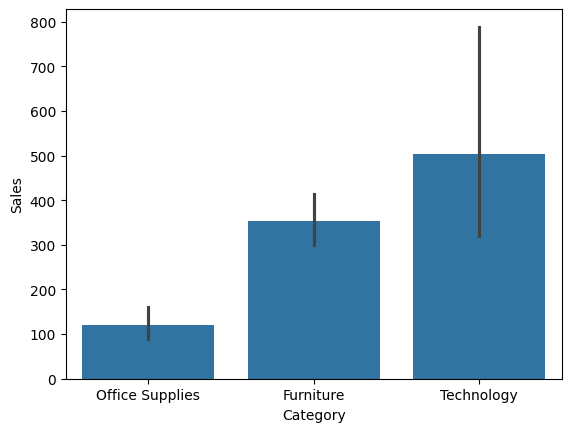

In [25]:
sns.barplot(x='Category', y='Sales', data=df)
plt.show()

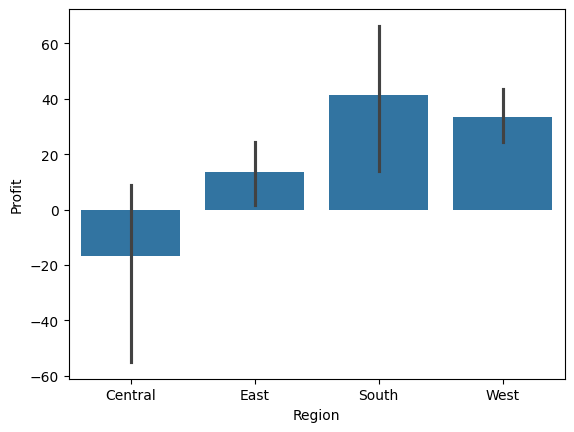

In [26]:
sns.barplot(x='Region', y='Profit', data=df)
plt.show()

In [30]:
from dateutil import parser

def parse_date(x):
    try:
        return parser.parse(x, dayfirst=False)  # dayfirst=True if format is D-M-Y
    except:
        return pd.NaT

df['order_date'] = df['order_date'].apply(parse_date)

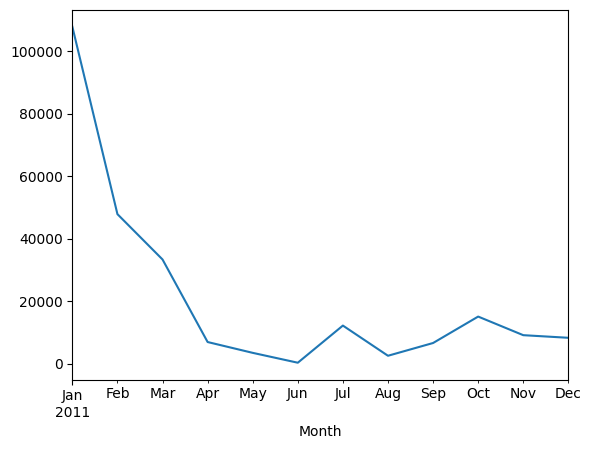

In [31]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['Month'] = df['order_date'].dt.to_period('M')

monthly = df.groupby('Month')['Sales'].sum()

monthly.plot()
plt.show()